<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%ED%85%8C%EC%9D%B4%EB%B8%94_%ED%95%B4%EC%8B%9C_%ED%95%A8%EC%88%98(Lv_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 테이블 해시 함수

[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/147354)

## 문제 설명

완호가 관리하는 어떤 데이터베이스의 한 테이블은 모두 정수 타입인 컬럼들로 이루어져 있습니다. 테이블은 2차원 행렬로 표현할 수 있으며 열은 컬럼을 나타내고, 행은 튜플을 나타냅니다.
첫 번째 컬럼은 기본키로서 모든 튜플에 대해 그 값이 중복되지 않도록 보장됩니다. 완호는 이 테이블에 대한 해시 함수를 다음과 같이 정의하였습니다.

1. 해시 함수는 col, row_begin, row_end을 입력으로 받습니다.
2. 테이블의 튜플을 col번째 컬럼의 값을 기준으로 오름차순 정렬을 하되, 만약 그 값이 동일하면 기본키인 첫 번째 컬럼의 값을 기준으로 내림차순 정렬합니다.
3. 정렬된 데이터에서 S_i를 i 번째 행의 튜플에 대해 각 컬럼의 값을 i 로 나눈 나머지들의 합으로 정의합니다.
4. row_begin ≤ i ≤ row_end 인 모든 S_i를 누적하여 bitwise XOR 한 값을 해시 값으로서 반환합니다.

테이블의 데이터 data와 해시 함수에 대한 입력 col, row_begin, row_end이 주어졌을 때 테이블의 해시 값을 return 하도록 solution 함수를 완성해주세요.

## 제한사항

- 1 ≤ data의 길이 ≤ 2,500
- 1 ≤ data의 원소의 길이 ≤ 500
- 1 ≤ data[i][j] ≤ 1,000,000
- data[i][j]는 i + 1 번째 튜플의 j + 1 번째 컬럼의 값을 의미합니다.
- 1 ≤ col ≤ data의 원소의 길이
- 1 ≤ row_begin ≤ row_end ≤ data의 길이

## 입출력 예

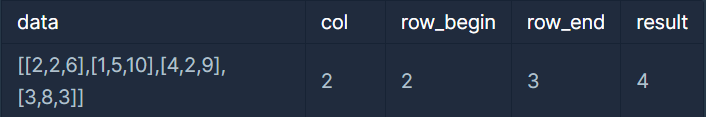

## 입출력 예 설명

- 정해진 방법에 따라 튜플을 정렬하면 {4, 2, 9}, {2, 2, 6}, {1, 5, 10}, {3, 8, 3} 이 됩니다.
- S_2 = (2 mod 2) + (2 mod 2) + (6 mod 2) = 0 입니다.
- S_3 = (1 mod 3) + (5 mod 3) + (10 mod 3) = 4 입니다.
- 따라서 해시 값은 S_2 XOR S_ 3 = 4 입니다.

## 첫 번째 방법

1. 입력받은 data를 (x[col - 1], -x[0])의 조건에 맞게 정렬.(x[col - 1]로 우선 정렬하고 같은 값이면 -x[0]으로 정렬)
2. 정렬된 데이터를 row_begin부터 row_end까지 순회하여 mod i한 값을 mod_sum에 더함.
3. mod_sum한 값을 answer에 XOR 연산하여 더한 후 answer을 return.

결과 : 성공

In [10]:
def solution(data, col, row_begin, row_end):
    answer= 0

    data.sort(key = lambda x : (x[col - 1], -x[0]))
    for i in range(row_begin, row_end + 1):
        mod_sum = 0
        for j in data[i - 1]:
            mod_sum += (j % i)
        answer ^= mod_sum
    return answer

solution([[2,2,6],[1,5,10],[4,2,9],[3,8,3]], 2, 2, 3)

4